In [1]:
# import packages 

import numpy as np 
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score,  ConfusionMatrixDisplay 
import statsmodels.discrete.discrete_model as sm 

In [2]:
# import Iris data 

iris = datasets.load_iris() 
print(iris.feature_names) 
print(iris.target_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
#create dataframe 

df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
df['target'] = iris.target 
df.head() 
 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# check missing values 

df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [5]:
# create train and test data 

X = df.drop('target', axis=1) 
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =1) 

Test accuracy =  0.9666666666666667


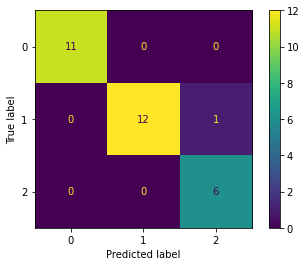

In [6]:
# fit the model using sklearn 

model_sk = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial') 
model_sk.fit(X_train, y_train) 
y_hat_sk = model_sk.predict(X_test) 
pred_sk = list(map(round, y_hat_sk)) 
# confusion matrix 
cm_sk = confusion_matrix(y_test, pred_sk)  
ConfusionMatrixDisplay(cm_sk).plot() 
# Accuracy 
print('Test accuracy = ', accuracy_score(y_test, pred_sk)) 

         Current function value: 0.073466
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
Test accuracy =  0.9666666666666667


/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


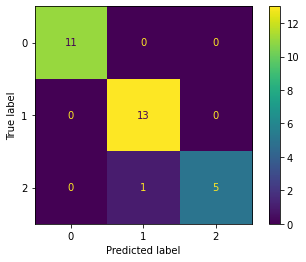

In [7]:
#fit the model using statsmodels 

model_stat = sm.MNLogit(y_train, X_train).fit(method='bfgs') 
model_stat.summary() 
y_hat_stat = model_stat.predict(X_test) 
pred_stat = np.asarray(y_hat_stat).argmax(1) 
# confusion matrix 
cm_stat = confusion_matrix(y_test, pred_stat)  
ConfusionMatrixDisplay(cm_stat).plot() 
# Accuracy 
print('Test accuracy = ', accuracy_score(y_test, pred_stat)) 